<a href="https://colab.research.google.com/github/AbdelnasserMostafa/-myproject/blob/master/KNeighbors_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Finding the Nearest Neighbors

For the simple task of finding the nearest neighbors between two sets of data, the unsupervised algorithms within sklearn.neighbors can be used:


In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [ ]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [ ]:
# Because the query set matches the training set, the nearest neighbor of each point is the point itself, at a distance of zero.
# It is also possible to efficiently produce a sparse graph showing the connections between neighboring points:

nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

KDTree and BallTree Classes

Alternatively, one can use the KDTree or BallTree classes directly to find nearest neighbors. This is the functionality wrapped by the NearestNeighbors class used above. The Ball Tree and KD Tree have the same interface; we’ll show an example of using the KD Tree here:

In [ ]:
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

Nearest Neighbors Classification

Automatically created module for IPython interactive environment


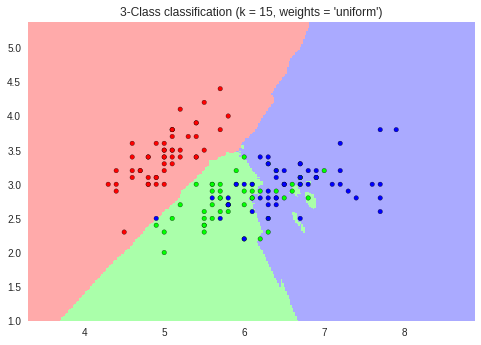

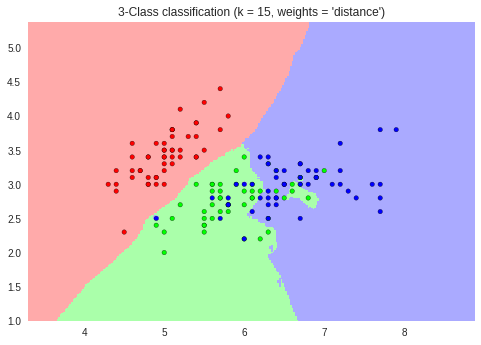

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

Nearest Neighbors Regression

Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.

scikit-learn implements two different neighbors regressors: KNeighborsRegressor implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user. RadiusNeighborsRegressor implements learning based on the neighbors within a fixed radius r of the query point, where r is a floating-point value specified by the user.

The basic nearest neighbors regression uses uniform weights: that is, each point in the local neighborhood contributes uniformly to the classification of a query point. Under some circumstances, it can be advantageous to weight points such that nearby points contribute more to the regression than faraway points. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns equal weights to all points. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied, which will be used to compute the weights.

he use of multi-output nearest neighbors for regression is demonstrated in Face completion with a multi-output estimators. In this example, the inputs X are the pixels of the upper half of faces and the outputs Y are the pixels of the lower half of those faces.


Demonstrate the resolution of a regression problem using a k-Nearest Neighbor and the interpolation of the target using both barycenter and constant weights.

Automatically created module for IPython interactive environment


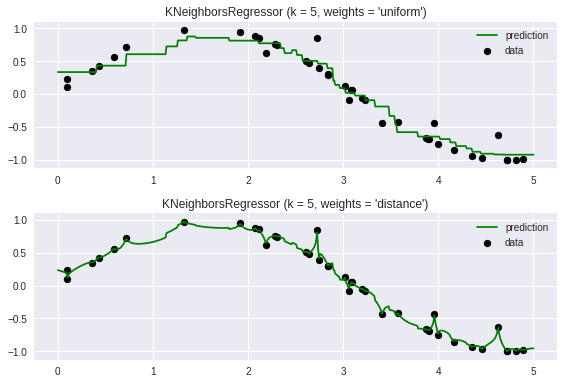

In [ ]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Fabian Pedregosa <fabian.pedregosa@inria.fr>
#
# License: BSD 3 clause (C) INRIA

# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
  knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
  y_ = knn.fit(X, y).predict(T)
  
  plt.subplot(2, 1, i + 1)
  plt.scatter(X, y, c='k', label='data')
  plt.plot(T, y_, c='g', label='prediction')
  plt.axis('tight')
  plt.legend()
  plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.tight_layout()
plt.show()

Face completion with a multi-output estimators

This example shows the use of multi-output estimator to complete images. The goal is to predict the lower half of a face given its upper half.  The first column of images shows true faces. The next columns illustrate how extremely randomized trees, k nearest neighbors, linear regression and ridge regression complete the lower half of those faces.

Automatically created module for IPython interactive environment
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


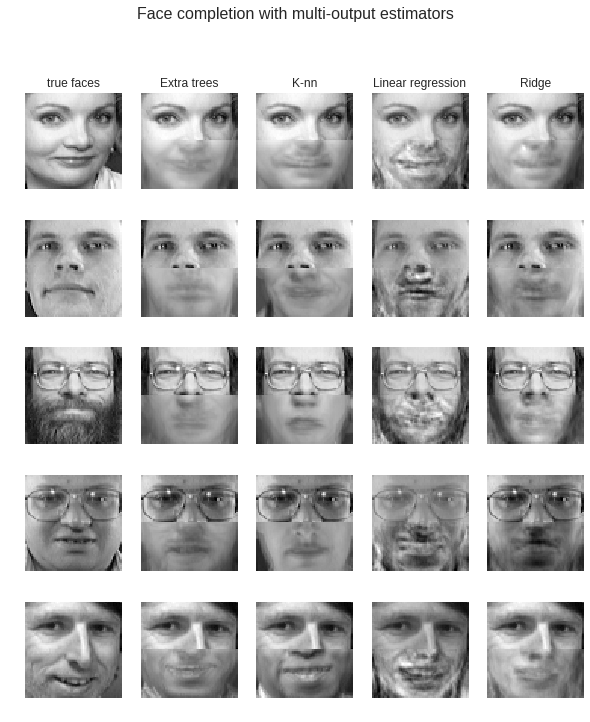

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV()
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
  estimator.fit(X_train, y_train)
  y_test_predict[name] = estimator.predict(X_test)
  
# Plot the completed foaces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle('Face completion with multi-output estimators', size = 16)

for i in range(n_faces):
  true_face = np.hstack((X_test[i], y_test[i]))
  
  if i:
    sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
  else:
    sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title='true faces')
    
  sub.axis('off')
  sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
  
  for j, est in enumerate(sorted(ESTIMATORS)):
    completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
    
    if i:
      sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
    else:
      sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)
      
    sub.axis('off')
    sub.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
    
plt.show()
      

In [ ]:
!pwd

/content


In [ ]:
'''
Nearest Centroid Classifier

The NearestCentroid classifier is a simple algorithm that represents each class by the centroid of its 
members. In effect, this makes it similar to the label updating phase of the sklearn.KMeans algorithm. 
It also has no parameters to choose, making it a good baseline classifier. It does, however, suffer on 
non-convex classes, as well as when classes have drastically different variances, as equal variance in 
all dimensions is assumed.
'''

'\nNearest Centroid Classifier\n\nThe NearestCentroid classifier is a simple algorithm that represents each class by the centroid of its \nmembers. In effect, this makes it similar to the label updating phase of the sklearn.KMeans algorithm. \nIt also has no parameters to choose, making it a good baseline classifier. It does, however, suffer on \nnon-convex classes, as well as when classes have drastically different variances, as equal variance in \nall dimensions is assumed.\n'

In [ ]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = NearestCentroid()
clf.fit(X, y)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [ ]:
print(clf.predict([[-0.8, -1]]))

[1]


Automatically created module for IPython interactive environment
None 0.8133333333333334
0.2 0.82


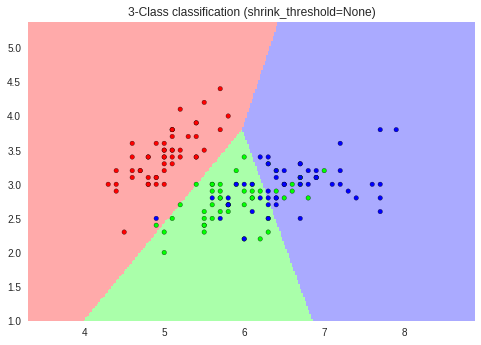

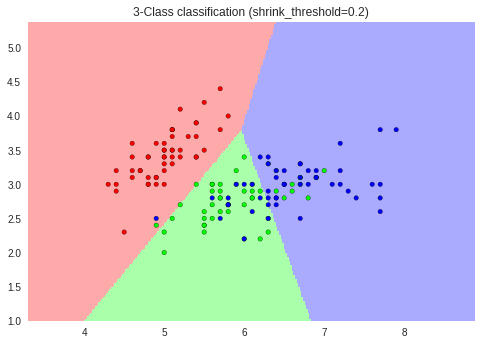

In [ ]:
# Nearest Centroid Classification
# Sample usage of Nearest Centroid classification. It will plot the decision boundaries for each class.

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
# We only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for shrinkage in [None, .2]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.title("3-Class classification (shrink_threshold=%r)"
              % shrinkage)
    plt.axis('tight')

plt.show()
